# Decision Tree Classifier
A Decision Tree Classifier is a machine learning algorithm used for classification tasks. It operates by splitting data into subsets based on feature values, forming a tree-like structure where each node represents a decision rule and each leaf node represents an outcome or class label.

# Decision Tree Classifier Works as:


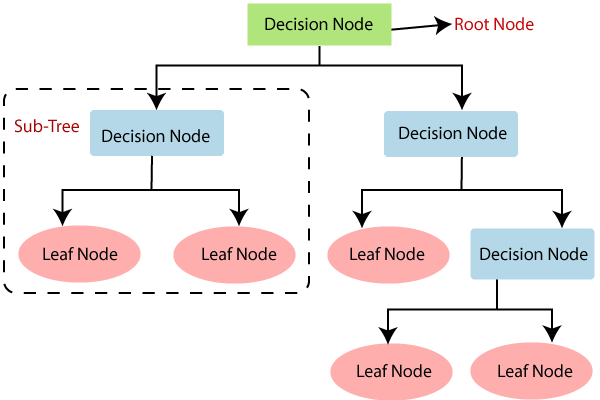

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



# Loading and Exploring the data

In [2]:
data= pd.read_csv('bank-full.csv', delimiter=";")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


There is no any null values, so we are good to go!
data types: int64(7), object(10)
Our target is y. As we have 10 columns with 'object' values so before applying DecisionTreeClassifier, first we need to apply OneHotEncoding with ColumnsTransformer so that we get numerical values, from categorical values.

In [3]:

# Target and feature separation
X = data.drop(columns='y')  # Features
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)
           

In [4]:



categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create a ColumnTransformer to handle both categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_cols)  # Encode categorical columns
    ], remainder='passthrough'  # Leave numerical columns as is
)

# Fit and transform the feature matrix
X_encoded = preprocessor.fit_transform(X)

# Print shape of encoded data to verify
print(f"Shape of encoded data: {X_encoded.shape}")

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Print the feature names to verify
print(feature_names)



Shape of encoded data: (45211, 51)
['cat__job_admin.' 'cat__job_blue-collar' 'cat__job_entrepreneur'
 'cat__job_housemaid' 'cat__job_management' 'cat__job_retired'
 'cat__job_self-employed' 'cat__job_services' 'cat__job_student'
 'cat__job_technician' 'cat__job_unemployed' 'cat__job_unknown'
 'cat__marital_divorced' 'cat__marital_married' 'cat__marital_single'
 'cat__education_primary' 'cat__education_secondary'
 'cat__education_tertiary' 'cat__education_unknown' 'cat__default_no'
 'cat__default_yes' 'cat__housing_no' 'cat__housing_yes' 'cat__loan_no'
 'cat__loan_yes' 'cat__contact_cellular' 'cat__contact_telephone'
 'cat__contact_unknown' 'cat__month_apr' 'cat__month_aug' 'cat__month_dec'
 'cat__month_feb' 'cat__month_jan' 'cat__month_jul' 'cat__month_jun'
 'cat__month_mar' 'cat__month_may' 'cat__month_nov' 'cat__month_oct'
 'cat__month_sep' 'cat__poutcome_failure' 'cat__poutcome_other'
 'cat__poutcome_success' 'cat__poutcome_unknown' 'remainder__age'
 'remainder__balance' 'remainder_

Thus Our categorical values are converted into numerical values now we first split data into train and test, then we apply our Decision Tree Classifier

# Decision tree classifier

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(max_depth = 5, random_state=42)

After splitting, i have applied model with depth 5, I will check it on different depths.
Now i will apply my model in train data

In [6]:

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

let me check accuracy of the model on test data.

In [7]:

# Evaluate the model on test data
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.8973791883224593


89% accuracy, means model is working good, now check the classification report , what it tells us about the product.

In [14]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['no', 'yes'])
print(report)

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7952
         yes       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



Precision: model predicts that one who not purchased says no to purchase 91% of the time , and one who purchased says purchase 65% times.
recall and f1-score also shows majority are biased towards "no purchase".
Support shows that 7952 samples has "no" labels and 1091 has labels "yes" labels, thus our data is imbalanced. let's try balancing the data using balanced

In [8]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [11]:
accuracy =clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.8748203029967931


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7952
           1       0.48      0.42      0.45      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.68      0.69      9043
weighted avg       0.87      0.87      0.87      9043



# Summary
After checking balanced I am getting same result that tells us that majority says not to purchase.
Beside model shows high accuracy, but majority class says no to purchase, despite changing max_depth or using balanced DecisionTreeClassifier which is much more in common dataset maybe its limitation of DecisionTreeclassifier.